In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('../data/01_raw/dengue_features_train.csv')
test = pd.read_csv('../data/01_raw/dengue_features_test.csv')
train_labels = pd.read_csv('../data/01_raw/dengue_labels_train.csv')

In [6]:
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [6]:
train['source'] = 'train'
test['source'] = 'test'

In [31]:
df = pd.concat([train, test])

<Axes: ylabel='year'>

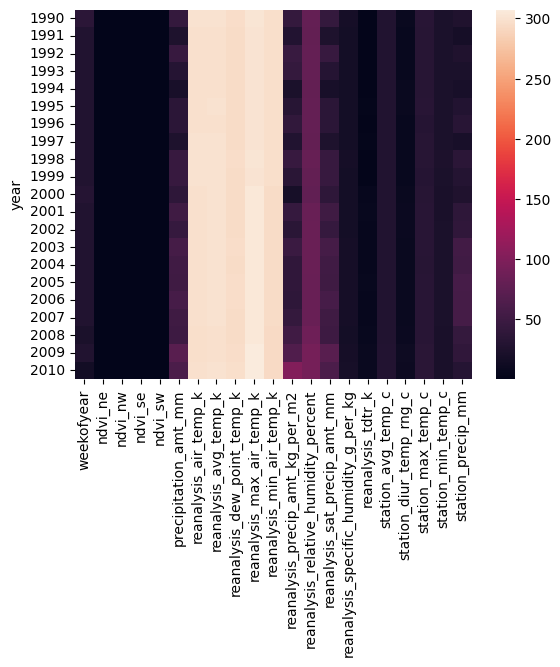

In [16]:
import seaborn as sns
sns.heatmap(train.groupby('year').mean('year'))

In [14]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [17]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
df_num = df.select_dtypes('float64')
df_scaled = scaler.fit_transform(df_num)
pd.DataFrame(df_scaled, columns=df_num.columns)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,-0.109230,-0.207826,-0.082344,-0.286403,-0.753528,-0.832648,-1.187814,-1.879073,-1.145381,0.067247,-0.192451,-1.231826,-0.753528,-1.793099,-0.655677,-1.392608,-0.500702,-1.574802,-1.339702,-0.493933
1,0.213927,0.099657,-0.563745,-0.544507,-0.506230,-0.372263,-0.637572,-0.872849,-0.802154,0.258909,-0.507040,-0.676017,-0.506230,-0.913933,-0.728215,-0.400004,-0.740403,-0.395288,0.024311,-0.658564
2,-0.726507,0.345897,-0.632466,-0.365403,-0.227544,0.038686,-0.295074,0.097839,-0.926964,0.603900,-0.324462,-0.025591,-0.227544,0.040036,-0.748365,-0.400004,-0.688576,-0.138872,0.396314,0.071149
3,-0.068010,0.922478,0.305081,0.393160,-0.683619,0.186998,-0.019953,0.016481,-0.646142,0.488903,-0.597434,-0.263823,-0.683619,-0.073553,-0.712096,0.191098,-0.559008,0.425243,0.706317,-0.760902
4,0.393611,1.059492,0.620135,0.526746,-0.870043,0.570137,0.322544,0.351265,-0.490130,0.680565,-0.635471,-0.246764,-0.870043,0.273680,-0.546870,1.339842,0.620063,1.297058,1.078320,-0.720856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1.112832,2.001763,1.012288,2.111050,-0.071081,-0.687426,-0.227698,0.231566,0.633158,-1.159390,0.604089,1.076505,-0.071081,0.257981,1.451958,0.135333,0.474299,0.066260,-0.223692,-0.115728
1868,0.744779,1.332532,1.075488,1.728186,0.651790,-1.125152,-0.727407,0.367163,0.882777,-1.581046,0.114083,1.618229,0.651790,0.427904,1.327032,0.229017,1.231625,0.681659,-0.471694,0.662929
1869,0.684169,0.970155,0.638601,0.555103,0.828703,-2.088151,-2.080554,-0.255648,0.352336,-1.926038,0.103343,1.767595,0.828703,-0.243476,0.686278,-0.020806,0.939124,0.066260,-0.347693,1.223562
1870,1.174028,1.383369,2.691116,2.353132,-0.108651,-2.126259,-1.457320,-1.071101,0.757968,-1.236055,-0.803282,0.946975,-0.108651,-1.066309,0.924042,-0.411156,0.215810,-0.138872,-0.223692,-0.091256


In [29]:
df['year'] = pd.to_datetime(df['year'])

In [40]:
df['year'] = pd.to_datetime(df['year'],format='%Y').dt.year

In [44]:
df['station_max_temp_c'] = df['station_max_temp_c'].astype('float64')

In [48]:
df[['reanalysis_air_temp_k','station_max_temp_c']] + 100

,reanalysis_air_temp_k,station_max_temp_c
0,397.572857,129.4
1,398.211429,131.7
2,398.781429,132.2
3,398.987143,133.3
4,399.518571,135.0
...,...,...
411,397.774286,132.6
412,397.167143,133.8
413,395.831429,132.6
414,395.778571,132.2


In [51]:
df.query("city == 'sj'")

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,source
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,train
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,train
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,train
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,train
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,sj,2013,13,2013-03-26,-0.087400,-0.016183,0.156343,0.105186,30.34,298.670000,...,78.780000,30.34,15.985714,3.314286,27.542857,7.942857,33.9,22.8,3.5,test
256,sj,2013,14,2013-04-02,-0.203250,-0.077833,0.204171,0.178914,6.55,298.035714,...,81.650000,6.55,15.881429,2.828571,26.642857,6.642857,33.3,22.8,17.6,test
257,sj,2013,15,2013-04-09,-0.117600,-0.008200,0.192700,0.170429,0.00,299.057143,...,78.285714,0.00,16.212857,3.171429,27.914286,8.114286,32.8,23.3,9.4,test
258,sj,2013,16,2013-04-16,0.082750,0.031200,0.135014,0.074857,0.00,298.912857,...,77.674286,0.00,15.965714,3.042857,27.728571,6.942857,31.7,23.9,22.9,test


In [52]:
df.query("city == 'iq'")

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,source
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,train
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,train
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,train
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,train
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,test
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,test
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,test
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,test


In [59]:
pd.concat([df,train_labels]) \
.groupby('city') \
.mean('total_cases') \
.drop(['year','weekofyear'],axis=1)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
city,,,,,,,,,,,,,,,,,,,,,
iq,0.264569,0.246152,0.252087,0.270362,62.778333,297.844165,299.111214,295.513157,307.057887,292.832143,...,88.863576,62.778333,17.123563,9.233355,27.533290,10.606971,33.994554,21.172466,55.928615,7.565385
sj,0.050453,0.060731,0.177523,0.163152,33.522270,299.227588,299.334698,295.155665,301.441751,297.360690,...,78.488882,33.522270,16.596055,2.531638,27.064298,6.625998,31.622980,22.710690,28.398485,34.180556


In [60]:
df.query("")

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,source
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,train
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,train
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,train
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,train
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,test
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,test
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,test
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,test


In [64]:
col = 'precipitation_amt_mm'
n = 2
for i, value in enumerate(df[col]):
    print(df[col][i-n:i].mean())

nan
nan
17.62
28.68
24.95
11.44
8.55
6.53
77.3
85.22
16.865000000000002
18.34
40.72
37.825
24.57
30.729999999999997
59.775
61.575
36.67
34.9
46.71
104.145
97.56
41.285
41.3
97.48500000000001
135.29000000000002
114.19
60.905
20.23
20.02
26.825
21.785
4.98
26.225
26.225
0.0
7.925
7.925
0.0
0.0
0.0
9.025
9.025
15.895
15.895
0.0
0.0
0.0
6.46
9.46
25.285
38.644999999999996
16.36
17.69
19.770000000000003
27.659999999999997
53.265
31.724999999999998
7.085
25.17
59.005
50.230000000000004
16.415
17.900000000000002
43.125
52.495
30.849999999999998
6.645
25.94
53.540000000000006
60.550000000000004
49.730000000000004
31.545
51.54
52.614999999999995
31.89
17.695
26.765
61.425
57.765
60.825
39.365
17.67
17.67
0.0
0.0
0.0
0.0
200.85
101.985
1.56
0.0
0.0
0.0
nan
nan
0.0
11.61
11.61
0.0
61.135
82.74
63.16
59.635
18.08
6.96
8.43
37.394999999999996
129.05
114.245
42.725
47.64
52.515
31.85
6.3
48.0
63.825
32.315
45.17
62.385
66.88499999999999
47.96
44.625
41.445
31.33
68.435
96.625
60.400000000000006
21.0

In [66]:
df.sort_values(['city','year','weekofyear'])

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,source
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,train
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,train
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,train
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,train
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,sj,2013,13,2013-03-26,-0.087400,-0.016183,0.156343,0.105186,30.34,298.670000,...,78.780000,30.34,15.985714,3.314286,27.542857,7.942857,33.9,22.8,3.5,test
256,sj,2013,14,2013-04-02,-0.203250,-0.077833,0.204171,0.178914,6.55,298.035714,...,81.650000,6.55,15.881429,2.828571,26.642857,6.642857,33.3,22.8,17.6,test
257,sj,2013,15,2013-04-09,-0.117600,-0.008200,0.192700,0.170429,0.00,299.057143,...,78.285714,0.00,16.212857,3.171429,27.914286,8.114286,32.8,23.3,9.4,test
258,sj,2013,16,2013-04-16,0.082750,0.031200,0.135014,0.074857,0.00,298.912857,...,77.674286,0.00,15.965714,3.042857,27.728571,6.942857,31.7,23.9,22.9,test


In [67]:
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,source
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,train
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,train
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,train
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,train
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,test
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,test
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,test
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,test
